In [2]:
import numpy as np
import cv2
import PIL.Image as Image
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

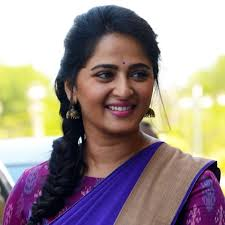

In [4]:
Image.open(r"C:\Users\varun\Desktop\uk\Projects\Image Classification\model\dataset\Anushka Shetty\66.jpg")

In [5]:
img = cv2.imread(r"C:\Users\varun\Desktop\uk\Projects\Image Classification\model\dataset\Anushka Shetty\66.jpg")
img.shape

(225, 225, 3)

In [6]:
# no.of rgb values at one pixel = 3
# no.of pixels in a row = 225
# no.of rows in the image = 225
img 

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 81,  88, 113],
        [ 80,  78, 108],
        [102,  79, 123],
        ...,
        [ 58,   3,  72],
        [ 93,  39, 106],
        [ 92,  36, 101]],

       [[ 88,  95, 115],
        [ 83,  79, 108],
        [111,  84, 128],
        ...,
        [ 58,   4,  71],
        [ 81,  25,  90],
        [132,  75, 136]],

       [[ 99, 108, 118],
        [104,  98, 121],
        [108,  74, 121],
        ...,
        [ 64,  10,  69],
        [ 71,  16,  73],
        [110,  53, 108]]

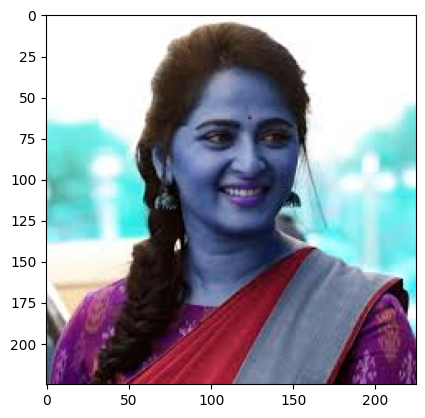

In [7]:
plt.imshow(img)

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(225, 225)

In [9]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 95,  87,  95, ...,  30,  65,  62],
       [100,  88, 100, ...,  30,  51, 100],
       [110, 106,  92, ...,  34,  39,  76]], dtype=uint8)

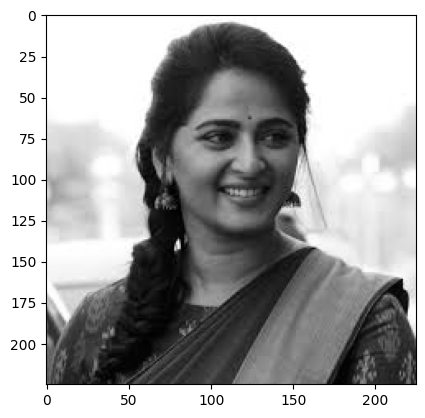

In [10]:
plt.imshow(gray, cmap='gray')

In [11]:
face_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[76, 39, 92, 92]])

In [12]:
(x1,y1,w1,h1)=faces[0]
x1,y1,w1,h1

(76, 39, 92, 92)

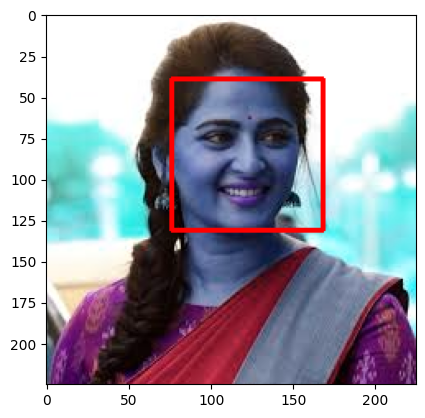

In [13]:
face_img = cv2.rectangle(img,(x1,y1),(x1+w1,y1+h1),(255,0,0),2)
plt.imshow(face_img)

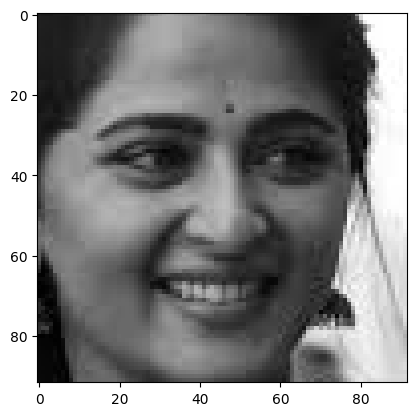

In [14]:
roi_gray1 = gray[y1:y1+h1, x1:x1+w1]
plt.imshow(roi_gray1,cmap='gray')

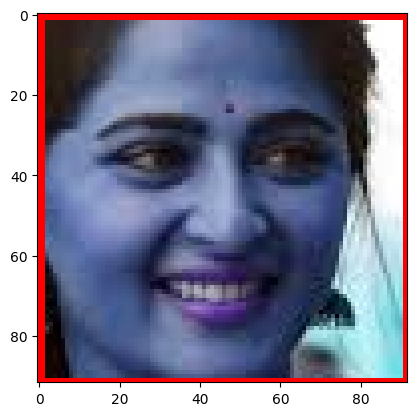

In [15]:
roi_color1 = img[y1:y1+h1, x1:x1+w1]
plt.imshow(roi_color1)

In [16]:
eyes = eye_cascade.detectMultiScale(roi_gray1)
eyes

array([[50, 23, 24, 24],
       [13, 17, 33, 33]])

In [17]:
(ex1,ey1,ew1,eh1)=eyes[0]
(ex2,ey2,ew2,eh2)=eyes[1]


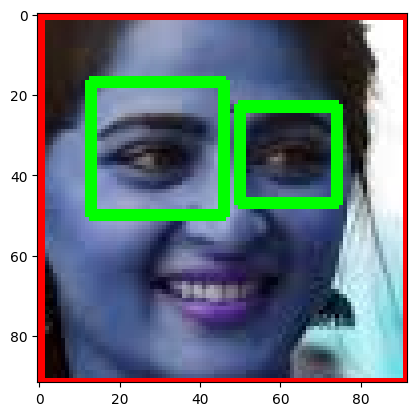

In [18]:
for (ex,ey,ew,eh) in eyes:
    eye_img = cv2.rectangle(roi_color1,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.imshow(eye_img)

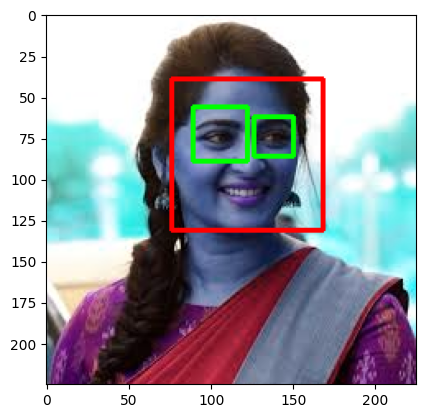

In [19]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

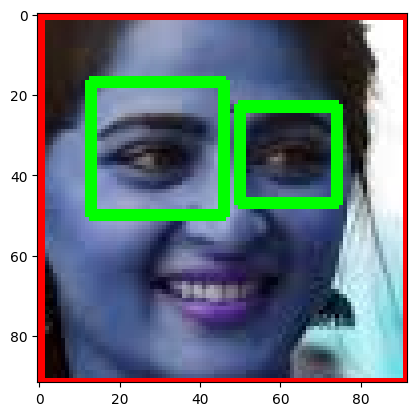

In [20]:
plt.imshow(roi_color)

In [21]:
def get_cropped_image_if_2_eyes(image_path):
    list=[]
    try:
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.3,5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h,x:x+w]
            roi_color = img[y:y+h,x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes)>=2:
                list.append(roi_color)
        return list
    except:
        pass

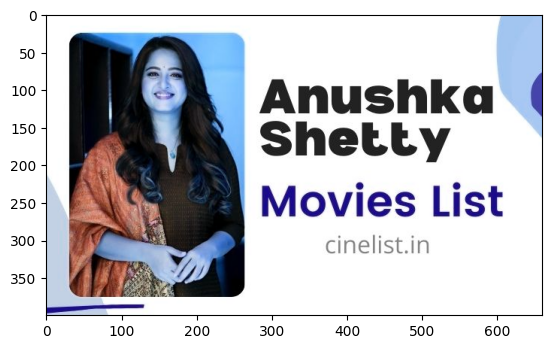

In [22]:
original_image = cv2.imread(r"C:\Users\varun\Desktop\uk\Projects\Image Classification\model\dataset\Anushka Shetty\56.jpg")
plt.imshow(original_image)

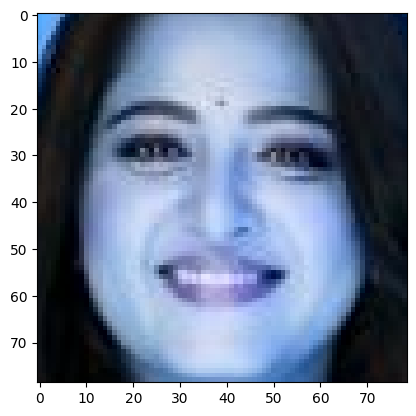

In [23]:
cropped_image = get_cropped_image_if_2_eyes(r"C:\Users\varun\Desktop\uk\Projects\Image Classification\model\dataset\Anushka Shetty\56.jpg")
plt.imshow(cropped_image[0])

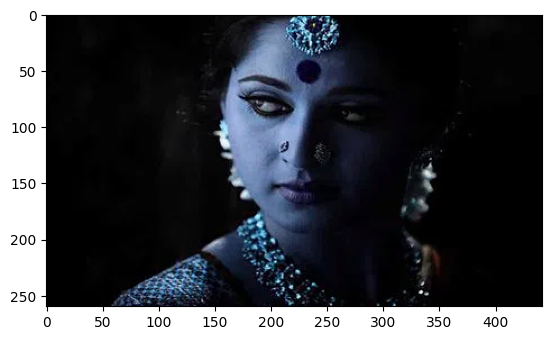

In [24]:
original_image_obstructed = cv2.imread(r"C:\Users\varun\Desktop\uk\Projects\Image Classification\model\dataset\Anushka Shetty\174.jpg")
plt.imshow(original_image_obstructed)

In [25]:
cropped_image1 = get_cropped_image_if_2_eyes(r"C:\Users\varun\Desktop\uk\Projects\Image Classification\model\dataset\Anushka Shetty\174.jpg")
cropped_image1

[]

In [26]:
path_to_data = "./dataset"
path_to_cr_data = "./dataset/cropped/"

In [28]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [36]:
img_dirs

['./dataset\\Anushka Shetty',
 './dataset\\Dhanush',
 './dataset\\Emilia Clarke',
 './dataset\\Jennifer Lawrence',
 './dataset\\Prabhas',
 './dataset\\Stephen Amell']

In [27]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [28]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            
            for i in range(len(roi_color)):
                
                cropped_file_name = celebrity_name + str(count) +".png"
                cropped_file_path = cropped_folder + "/" +cropped_file_name
            
                cv2.imwrite(cropped_file_path, roi_color[i])
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count+=1

Anushka Shetty
Generating cropped images in folder:  ./dataset/cropped/Anushka Shetty
Dhanush
Generating cropped images in folder:  ./dataset/cropped/Dhanush
Emilia Clarke
Generating cropped images in folder:  ./dataset/cropped/Emilia Clarke
Jennifer Lawrence
Generating cropped images in folder:  ./dataset/cropped/Jennifer Lawrence
Prabhas
Generating cropped images in folder:  ./dataset/cropped/Prabhas
Stephen Amell
Generating cropped images in folder:  ./dataset/cropped/Stephen Amell


In [32]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

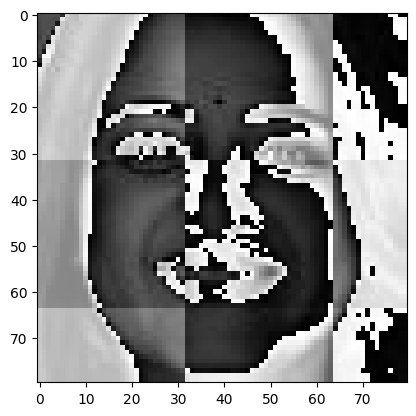

In [37]:
im_har = w2d(cropped_image[0],'db1',5)
plt.imshow(im_har, cmap='gray')

In [38]:
im_har.shape

(80, 80)

In [39]:
cropped_img = np.array(cropped_image[0])
cropped_img.shape

(79, 79, 3)

In [85]:
scaled_raw_img = cv2.resize(cropped_image[0],(32,32))

In [41]:
scaled_raw_img.shape

(32, 32, 3)

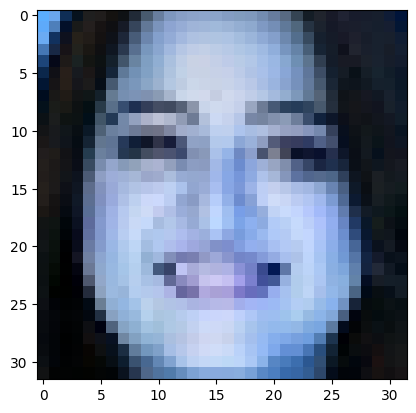

In [42]:
plt.imshow(scaled_raw_img)

In [90]:
scaled_img_har = cv2.resize(im_har,(32,32))
scaled_img_har.shape

(32, 32)

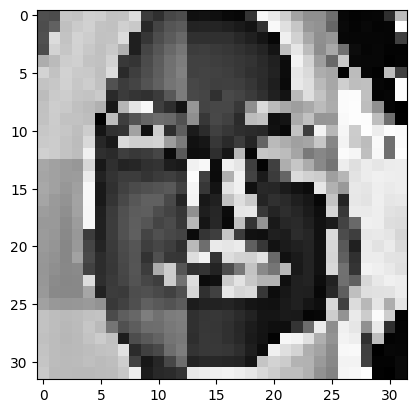

In [44]:
plt.imshow(scaled_img_har, cmap='gray')

In [45]:
cropped_image_dirs=[]
for entry in os.scandir(path_to_cr_data):
    if entry.is_dir():
        cropped_image_dirs.append(entry.path)
cropped_image_dirs

['./dataset/cropped/Anushka Shetty',
 './dataset/cropped/Dhanush',
 './dataset/cropped/Emilia Clarke',
 './dataset/cropped/Jennifer Lawrence',
 './dataset/cropped/Prabhas',
 './dataset/cropped/Stephen Amell']

In [46]:
celebrity_file_names_dict={}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Anushka Shetty': ['./dataset/cropped/Anushka Shetty\\Anushka Shetty1.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty10.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty100.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty101.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty102.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty103.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty104.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty105.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty106.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty107.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty108.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty109.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty11.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty110.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty111.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty112.png',
  './datas

In [47]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count = count+1
class_dict

{'Anushka Shetty': 0,
 'Dhanush': 1,
 'Emilia Clarke': 2,
 'Jennifer Lawrence': 3,
 'Prabhas': 4,
 'Stephen Amell': 5}

In [48]:
X=[]
y=[]

for celebrity_name,training_images_path_array in celebrity_file_names_dict.items():
    for training_image_path in training_images_path_array:
        img = cv2.imread(training_image_path)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [49]:
len(X)

1060

In [50]:
32*32*3+32*32

4096

In [51]:
len(X[0])

4096

In [52]:
X[0]

array([[ 32],
       [ 24],
       [ 20],
       ...,
       [245],
       [173],
       [192]], dtype=uint8)

In [53]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1060, 4096)

In [54]:
X[0]

array([ 32.,  24.,  20., ..., 245., 173., 192.])

In [55]:
Z=X

In [56]:
Z

array([[ 32.,  24.,  20., ..., 245., 173., 192.],
       [ 30.,  35.,  42., ...,   2.,  11., 251.],
       [149., 138., 134., ..., 244.,  83., 250.],
       ...,
       [ 36.,  38.,  32., ..., 207., 213.,  57.],
       [ 25.,  27.,  33., ..., 255.,  45.,   3.],
       [230., 230., 230., ..., 211., 174., 194.]])

In [57]:
r=y

In [59]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C = 10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8641509433962264

In [61]:
len(X_test)

265

In [62]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.88      0.95      0.92        40
           2       0.80      0.84      0.82        43
           3       0.83      0.85      0.84        46
           4       0.96      0.85      0.90        55
           5       0.84      0.82      0.83        51

    accuracy                           0.86       265
   macro avg       0.86      0.87      0.87       265
weighted avg       0.87      0.86      0.86       265



In [63]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [64]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [66]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(),mp['model'])
    clf = GridSearchCV(pipe, mp['params'],cv = 5, return_train_score=False)
    clf.fit(X_train,y_train)
    
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_parameters': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_



In [67]:
scores

[{'model': 'svm',
  'best_score': 0.8553459119496857,
  'best_parameters': {'svc__C': 1, 'svc__kernel': 'linear'}},
 {'model': 'random_forest',
  'best_score': 0.6,
  'best_parameters': {'randomforestclassifier__n_estimators': 10}},
 {'model': 'logistic_regression',
  'best_score': 0.8364779874213836,
  'best_parameters': {'logisticregression__C': 1}}]

In [68]:
df = pd.DataFrame(scores,columns=['model','best_score','best_parameters'])
df

,model,best_score,best_parameters
0,svm,0.855346,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.600000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.836478,{'logisticregression__C': 1}


In [69]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [70]:
best_estimators['svm']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [74]:
best_estimators['svm'].score(X_test,y_test)

0.8452830188679246

In [75]:
best_estimators['random_forest'].score(X_test,y_test)

0.630188679245283

In [76]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8452830188679246

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_estimators['svm'].predict(X_test))
cm

array([[27,  0,  1,  1,  0,  1],
       [ 0, 38,  0,  0,  1,  1],
       [ 2,  0, 34,  6,  0,  1],
       [ 0,  0,  8, 38,  0,  0],
       [ 0,  3,  0,  0, 49,  3],
       [ 5,  1,  3,  3,  1, 38]], dtype=int64)

Text(70.72222222222221, 0.5, 'Truth')

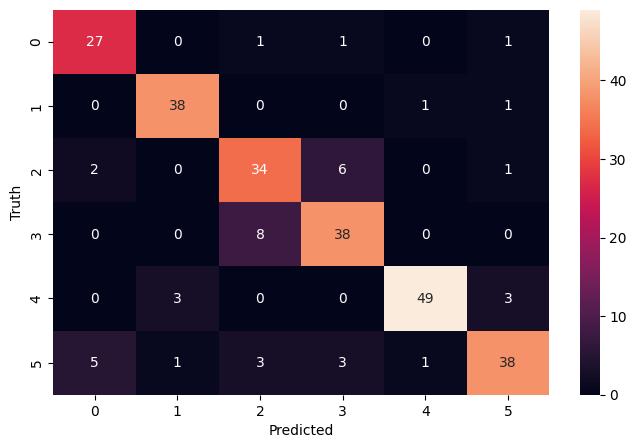

In [79]:
import seaborn as sn
plt.figure(figsize=(8,5))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count = count+1
class_dict

{'Anushka Shetty': 0,
 'Dhanush': 1,
 'Emilia Clarke': 2,
 'Jennifer Lawrence': 3,
 'Prabhas': 4,
 'Stephen Amell': 5}

## Neural network

In [91]:
scaled_raw_img.shape

(32, 32, 3)

In [92]:
scaled_img_har.shape

(32, 32)

In [93]:
gray_image = scaled_img_har

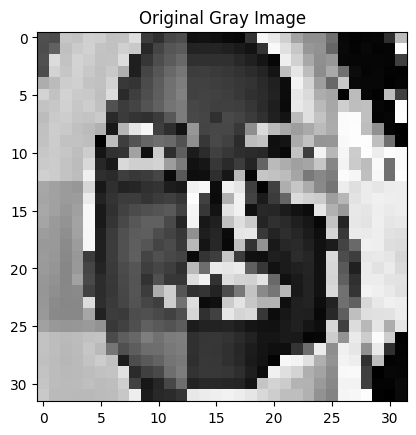

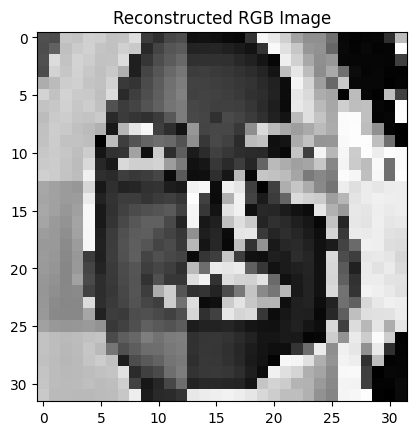

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a single gray image called gray_image
# with shape (height, width)

# Create an empty array to store the RGB image
height, width = gray_image.shape
rgb_image = np.empty((height, width, 3), dtype=np.uint8)

# Assign the gray intensity values to all three color channels
rgb_image[..., 0] = gray_image
rgb_image[..., 1] = gray_image
rgb_image[..., 2] = gray_image

# Display the original gray image
plt.imshow(gray_image, cmap='gray')
plt.title('Original Gray Image')
plt.show()

# Display the reconstructed RGB image
plt.imshow(rgb_image)
plt.title('Reconstructed RGB Image')
plt.show()


In [95]:
added = np.vstack((scaled_raw_img,rgb_image))

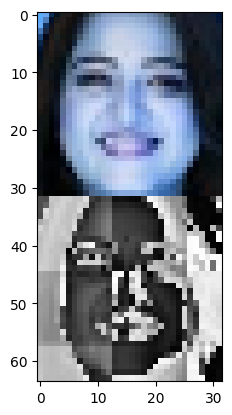

In [96]:
plt.imshow(added)

In [97]:
celebrity_file_names_dict

{'Anushka Shetty': ['./dataset/cropped/Anushka Shetty\\Anushka Shetty1.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty10.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty100.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty101.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty102.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty103.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty104.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty105.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty106.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty107.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty108.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty109.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty11.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty110.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty111.png',
  './dataset/cropped/Anushka Shetty\\Anushka Shetty112.png',
  './datas

In [98]:
class_dict

{'Anushka Shetty': 0,
 'Dhanush': 1,
 'Emilia Clarke': 2,
 'Jennifer Lawrence': 3,
 'Prabhas': 4,
 'Stephen Amell': 5}

In [99]:

def gray_to_rgb_convertor(gray_image):

# Assuming you have a single gray image called gray_image
# with shape (height, width)

# Create an empty array to store the RGB image
    height, width = gray_image.shape
    rgb_image = np.empty((height, width, 3), dtype=np.uint8)

# Assign the gray intensity values to all three color channels
    rgb_image[..., 0] = gray_image
    rgb_image[..., 1] = gray_image
    rgb_image[..., 2] = gray_image

    return rgb_image


In [100]:
X=[]
y=[]

for celebrity_name,training_images_path_array in celebrity_file_names_dict.items():
    for training_image_path in training_images_path_array:
        img = cv2.imread(training_image_path)
        scaled_raw_img = cv2.resize(img,(128,128))
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har,(128,128))
        scaled_rgb_img_har = gray_to_rgb_convertor(scaled_img_har)
        combined_img = np.vstack((scaled_raw_img,scaled_rgb_img_har))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [101]:
X = np.array(X)
y= np.array(y)

In [102]:
y

array([0, 0, 0, ..., 5, 5, 5])

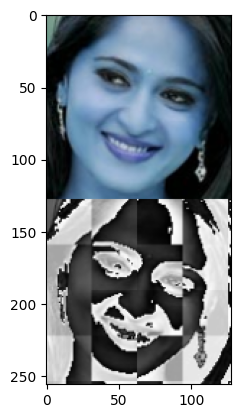

In [103]:
plt.imshow(X[60])

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [105]:
len(X_train)

795

In [106]:
len(X_test)

265

In [172]:
y_train[:5]

array([3, 0, 5, 1, 0])

In [107]:
X_train[0].shape

(256, 128, 3)

In [108]:
X_train[0]

array([[[  0,  19,  42],
        [  0,  18,  41],
        [  2,  22,  44],
        ...,
        [ 15,  44,  73],
        [ 15,  41,  71],
        [ 15,  39,  69]],

       [[  0,  17,  39],
        [  0,  19,  39],
        [  4,  23,  45],
        ...,
        [ 16,  44,  75],
        [ 16,  42,  73],
        [ 15,  41,  71]],

       [[  0,  15,  38],
        [  0,  19,  38],
        [  6,  23,  46],
        ...,
        [ 18,  45,  79],
        [ 16,  43,  76],
        [ 17,  41,  73]],

       ...,

       [[225, 225, 225],
        [231, 231, 231],
        [238, 238, 238],
        ...,
        [248, 248, 248],
        [247, 247, 247],
        [251, 251, 251]],

       [[226, 226, 226],
        [229, 229, 229],
        [235, 235, 235],
        ...,
        [244, 244, 244],
        [246, 246, 246],
        [251, 251, 251]],

       [[226, 226, 226],
        [230, 230, 230],
        [236, 236, 236],
        ...,
        [241, 241, 241],
        [245, 245, 245],
        [251, 251, 251]]

In [109]:
y_train[:5]

array([3, 0, 5, 1, 0])

In [110]:
X_train_scaled = X_train / 255
X_test_scaled = X_test /255

In [111]:
X_train_scaled[0]

array([[[0.        , 0.0745098 , 0.16470588],
        [0.        , 0.07058824, 0.16078431],
        [0.00784314, 0.08627451, 0.17254902],
        ...,
        [0.05882353, 0.17254902, 0.28627451],
        [0.05882353, 0.16078431, 0.27843137],
        [0.05882353, 0.15294118, 0.27058824]],

       [[0.        , 0.06666667, 0.15294118],
        [0.        , 0.0745098 , 0.15294118],
        [0.01568627, 0.09019608, 0.17647059],
        ...,
        [0.0627451 , 0.17254902, 0.29411765],
        [0.0627451 , 0.16470588, 0.28627451],
        [0.05882353, 0.16078431, 0.27843137]],

       [[0.        , 0.05882353, 0.14901961],
        [0.        , 0.0745098 , 0.14901961],
        [0.02352941, 0.09019608, 0.18039216],
        ...,
        [0.07058824, 0.17647059, 0.30980392],
        [0.0627451 , 0.16862745, 0.29803922],
        [0.06666667, 0.16078431, 0.28627451]],

       ...,

       [[0.88235294, 0.88235294, 0.88235294],
        [0.90588235, 0.90588235, 0.90588235],
        [0.93333333, 0

In [112]:
import tensorflow as tf
from tensorflow import keras

In [113]:
X_train_scaled[0].shape

(256, 128, 3)

In [114]:
256*128*3

98304

In [118]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=( 256, 128, 3)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(6, activation='sigmoid')
    
])

model.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
)

model.fit(X_train_scaled, y_train, epochs = 30)

Epoch 1/30
25/25 [==============================] - 17s 599ms/step - loss: 72.8763 - accuracy: 0.2566
Epoch 2/30
25/25 [==============================] - 14s 541ms/step - loss: 5.4802 - accuracy: 0.4767
Epoch 3/30
25/25 [==============================] - 13s 535ms/step - loss: 1.6306 - accuracy: 0.6403
Epoch 4/30
25/25 [==============================] - 13s 538ms/step - loss: 0.4933 - accuracy: 0.8088
Epoch 5/30
25/25 [==============================] - 14s 555ms/step - loss: 0.2310 - accuracy: 0.9132
Epoch 6/30
25/25 [==============================] - 13s 536ms/step - loss: 0.1643 - accuracy: 0.9459
Epoch 7/30
25/25 [==============================] - 13s 537ms/step - loss: 0.0828 - accuracy: 0.9849
Epoch 8/30
25/25 [==============================] - 13s 532ms/step - loss: 0.0550 - accuracy: 0.9937
Epoch 9/30
25/25 [==============================] - 13s 538ms/step - loss: 0.0324 - accuracy: 1.0000
Epoch 10/30
25/25 [==============================] - 13s 532ms/step - loss: 0.0275 - accur

In [119]:
model.evaluate(X_test_scaled,y_test)

9/9 [==============================] - 1s 43ms/step - loss: 0.5836 - accuracy: 0.7660


[0.5836440920829773, 0.7660377621650696]

In [147]:
cnn = keras.Sequential([
    
    keras.layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation = 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation = 'relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation='softmax')
    
])

cnn.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
)

cnn.fit(X_train_scaled, y_train, epochs = 20)

Epoch 1/20
25/25 [==============================] - 13s 488ms/step - loss: 1.8669 - accuracy: 0.1774
Epoch 2/20
25/25 [==============================] - 12s 489ms/step - loss: 1.7266 - accuracy: 0.2566
Epoch 3/20
25/25 [==============================] - 13s 518ms/step - loss: 1.4039 - accuracy: 0.4428
Epoch 4/20
25/25 [==============================] - 12s 492ms/step - loss: 0.9136 - accuracy: 0.6465
Epoch 5/20
25/25 [==============================] - 12s 485ms/step - loss: 0.6371 - accuracy: 0.7509
Epoch 6/20
25/25 [==============================] - 12s 488ms/step - loss: 0.4336 - accuracy: 0.8415
Epoch 7/20
25/25 [==============================] - 13s 519ms/step - loss: 0.2733 - accuracy: 0.9006
Epoch 8/20
25/25 [==============================] - 12s 490ms/step - loss: 0.2259 - accuracy: 0.9132
Epoch 9/20
25/25 [==============================] - 13s 510ms/step - loss: 0.1531 - accuracy: 0.9497
Epoch 10/20
25/25 [==============================] - 12s 497ms/step - loss: 0.1229 - accura

In [148]:
cnn.evaluate(X_test_scaled,y_test)

9/9 [==============================] - 1s 74ms/step - loss: 0.4131 - accuracy: 0.8792


[0.41313818097114563, 0.8792452812194824]

In [158]:
test1= cv2.imread(r"C:\Users\varun\Desktop\uk\Projects\Image Classification\model\Testing dataset\Anushka\48.jpg")
test1

array([[[130, 173, 224],
        [128, 171, 222],
        [127, 168, 217],
        ...,
        [243, 248, 251],
        [243, 248, 251],
        [243, 248, 251]],

       [[131, 171, 223],
        [129, 170, 219],
        [125, 166, 215],
        ...,
        [243, 248, 251],
        [243, 248, 251],
        [243, 248, 251]],

       [[130, 170, 219],
        [128, 168, 216],
        [124, 164, 212],
        ...,
        [243, 248, 251],
        [243, 248, 251],
        [243, 248, 251]],

       ...,

       [[167, 181, 209],
        [167, 181, 209],
        [167, 181, 210],
        ...,
        [178, 187, 214],
        [177, 186, 213],
        [177, 186, 213]],

       [[166, 180, 208],
        [166, 180, 208],
        [167, 181, 210],
        ...,
        [178, 186, 215],
        [176, 184, 213],
        [176, 185, 212]],

       [[166, 180, 208],
        [166, 180, 208],
        [166, 180, 209],
        ...,
        [177, 185, 215],
        [175, 183, 213],
        [175, 183, 212]]

In [159]:
croptest1 = get_cropped_image_if_2_eyes(r"C:\Users\varun\Desktop\uk\Projects\Image Classification\model\Testing dataset\Anushka\48.jpg")

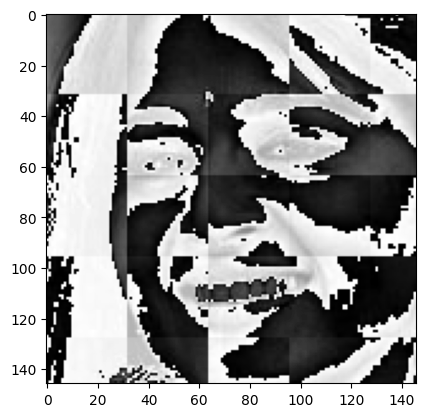

In [160]:
im_har = w2d(croptest1[0],'db1',5)
plt.imshow(im_har, cmap='gray')

In [161]:
scaled_raw_img = cv2.resize(croptest1[0],(128,128))
img_har = w2d(croptest1[0],'db1',5)
scaled_img_har = cv2.resize(img_har,(128,128))
scaled_rgb_img_har = gray_to_rgb_convertor(scaled_img_har)
combined_img = np.vstack((scaled_raw_img,scaled_rgb_img_har))

In [162]:
combined_image = combined_img/255

In [163]:
combined_image = np.array(combined_image)

In [164]:
combined_image = combined_image.reshape(1,256,128,3)

In [165]:
combined_image.shape

(1, 256, 128, 3)

In [168]:
y_predicted =cnn.predict(combined_image)
y_predicted

1/1 [==============================] - 0s 39ms/step


array([[9.9999106e-01, 4.3998949e-07, 2.6120638e-06, 4.0066769e-07,
        5.4225516e-06, 7.1431401e-08]], dtype=float32)

In [184]:
y_predicted = cnn.predict(X_test_scaled)
y_predicted[:5]

9/9 [==============================] - 1s 72ms/step


array([[8.89289176e-09, 9.06796253e-12, 9.99999881e-01, 1.14207516e-07,
        6.40893241e-11, 3.66424613e-10],
       [2.23163661e-05, 8.81675482e-01, 1.72814820e-03, 4.38857605e-05,
        1.14341557e-01, 2.18850840e-03],
       [1.20537102e-01, 6.56559050e-01, 2.08904706e-02, 1.22969819e-03,
        1.91331491e-01, 9.45226755e-03],
       [1.56580800e-14, 9.99999166e-01, 6.24094526e-12, 8.20574603e-15,
        8.87926717e-07, 2.51910159e-10],
       [7.09524052e-15, 9.99997377e-01, 1.35800711e-11, 8.42117954e-15,
        2.63657967e-06, 2.66830199e-12]], dtype=float32)

In [186]:
y_predicted_values = []
for i in y_predicted :
    final = np.argmax(i)
    y_predicted_values.append(final)
y_predicted_values[:5]

[2, 1, 1, 1, 1]

In [192]:
y_predicted_values = np.array(y_predicted_values)
y_predicted_values[:5]

array([2, 1, 1, 1, 1], dtype=int64)

In [187]:
y_test[:5]

array([2, 1, 4, 1, 1])

In [190]:
from tensorflow.math import confusion_matrix

In [193]:
cm = confusion_matrix(y_test,y_predicted_values)
cm

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[25,  0,  3,  2,  0,  0],
       [ 0, 37,  0,  0,  2,  1],
       [ 0,  0, 40,  2,  0,  1],
       [ 0,  0,  3, 43,  0,  0],
       [ 0,  6,  0,  0, 47,  2],
       [ 0,  1,  1,  3,  5, 41]])>

Text(70.72222222222221, 0.5, 'Truth')

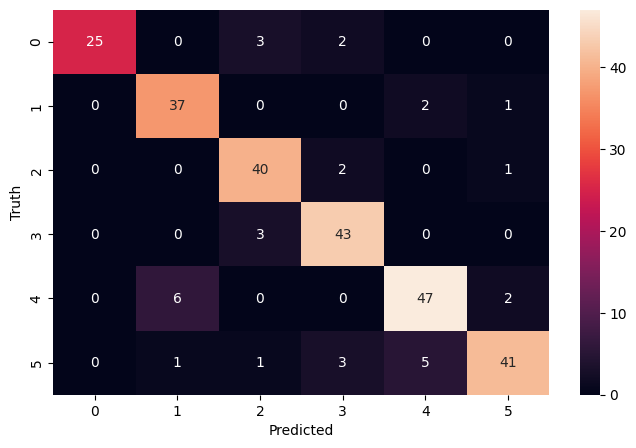

In [194]:
import seaborn as sn
plt.figure(figsize=(8,5))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [195]:
class_dict

{'Anushka Shetty': 0,
 'Dhanush': 1,
 'Emilia Clarke': 2,
 'Jennifer Lawrence': 3,
 'Prabhas': 4,
 'Stephen Amell': 5}

In [196]:
print(classification_report(y_test,y_predicted_values))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        30
           1       0.84      0.93      0.88        40
           2       0.85      0.93      0.89        43
           3       0.86      0.93      0.90        46
           4       0.87      0.85      0.86        55
           5       0.91      0.80      0.85        51

    accuracy                           0.88       265
   macro avg       0.89      0.88      0.88       265
weighted avg       0.88      0.88      0.88       265



In [197]:
import joblib

In [198]:
joblib.dump(cnn, 'saved_model.pkl')

['saved_model.pkl']

In [200]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))